In [1]:
%matplotlib inline

In [2]:
path = 'screenshots/Screenshot from Jayne Reviews - Bronze Ana-jOZ_VdD1-9I.mkv.png'

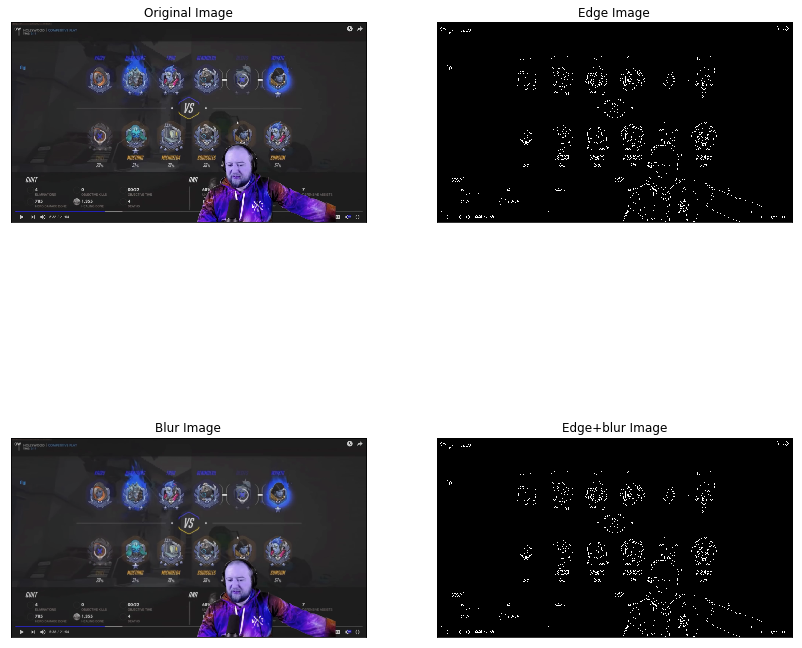

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path)
edges = cv2.Canny(blur,100,200)
blur = cv2.GaussianBlur(img,(5,5),0)
edges2 = cv2.Canny(blur,100,200)

f = plt.figure(figsize=(14,14))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge+blur Image'), plt.xticks([]), plt.yticks([])

plt.show()

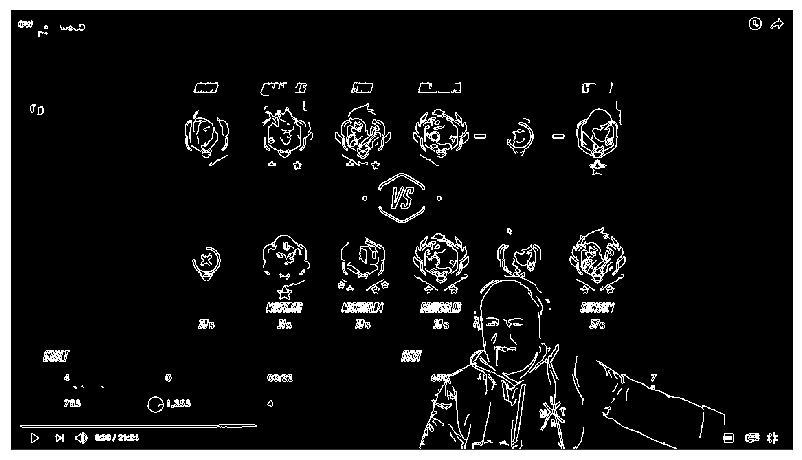

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

edgesDilated = cv2.dilate(edges,kernel,iterations = 1)

f = plt.figure(figsize=(14,14))
plt.subplot(111),plt.imshow(edgesDilated,cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

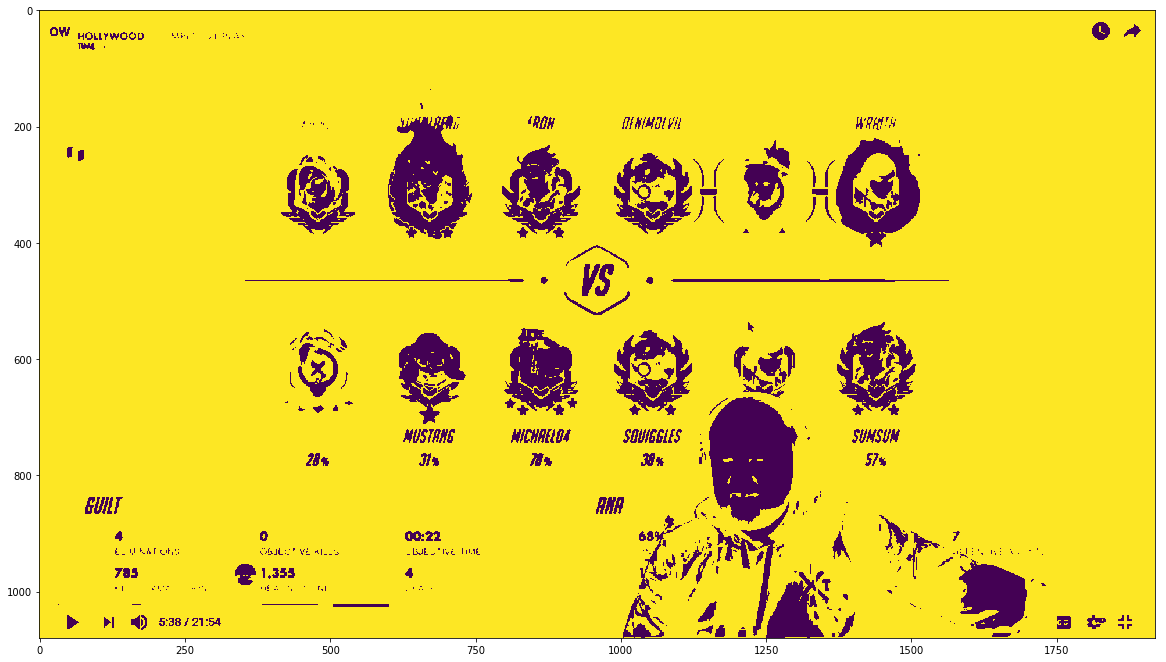

In [4]:
import numpy as np
import cv2

img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, ret = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

f = plt.figure(figsize=(20,20))
plt.subplot(111)
plt.imshow(ret);

525


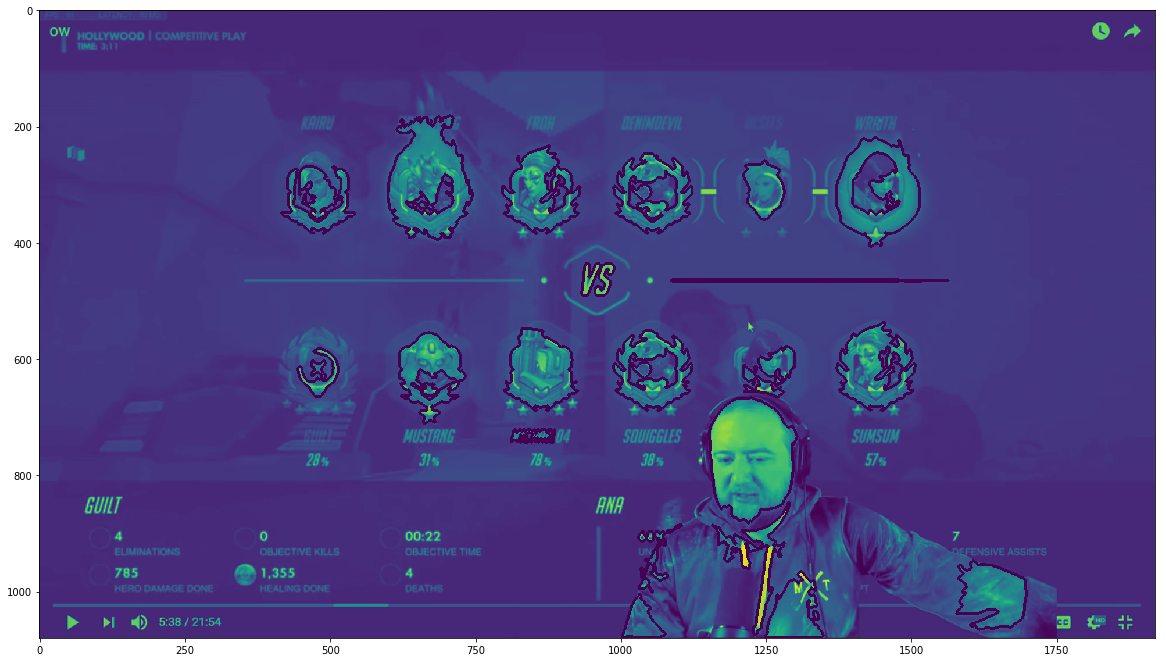

In [12]:
import cv2
import numpy as np

img = cv2.imread(path, 0)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh= cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2, contours,hierarchy = cv2.findContours(thresh, 1, 2)

print(len(contours))
for cnt in contours:
    M = cv2.moments(cnt)
    # print(M['m00'])
    if M['m00'] < 1000: continue
    x,y,w,h = cv2.boundingRect(cnt)
    # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

f = plt.figure(figsize=(20,20))
plt.subplot(111)
plt.imshow(img);

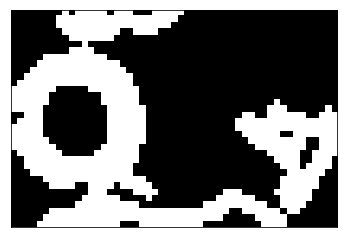

In [25]:
roadhog = cv2.imread('screenshots/roadhog.png')
edges = cv2.Canny(roadhog,100,200)
roadhogEdgesDilated = cv2.dilate(edges,kernel,iterations = 1)


plt.subplot(111),plt.imshow(roadhogEdgesDilated ,cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])

plt.show()

[[ 0.08936429  0.0861498   0.08978686 ...  0.18924652  0.2278036
   0.23331171]
 [ 0.09723371  0.10060879  0.08640901 ...  0.17366123  0.210447
   0.22095726]
 [ 0.07376751  0.07200231  0.06138469 ...  0.13961792  0.14978282
   0.16503026]
 ...
 [-0.04153214 -0.04127228 -0.04902263 ...  0.0885757   0.10434902
   0.09202166]
 [-0.05481144 -0.04787509 -0.04940771 ...  0.12120272  0.12371995
   0.10700221]
 [-0.06877226 -0.06130267 -0.05613175 ...  0.14657916  0.13929729
   0.14357737]]
((1031, 597), (1082, 631))


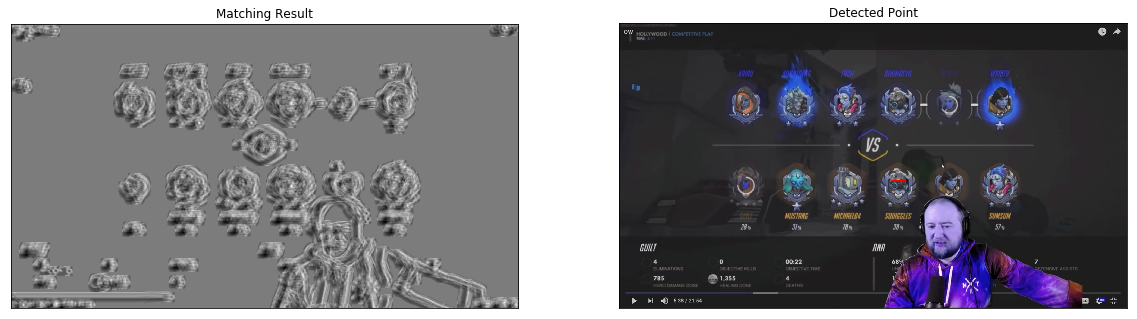

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = edgesDilated
img2 = img.copy()
template = roadhogEdgesDilated
w, h = template.shape[::-1]

img = img2.copy()
method = cv2.TM_CCOEFF_NORMED

res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

print(top_left, bottom_right)
img = cv2.imread(path)
cv2.rectangle(img,top_left, bottom_right, 255, 2)

f = plt.figure(figsize=(20,8))

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()


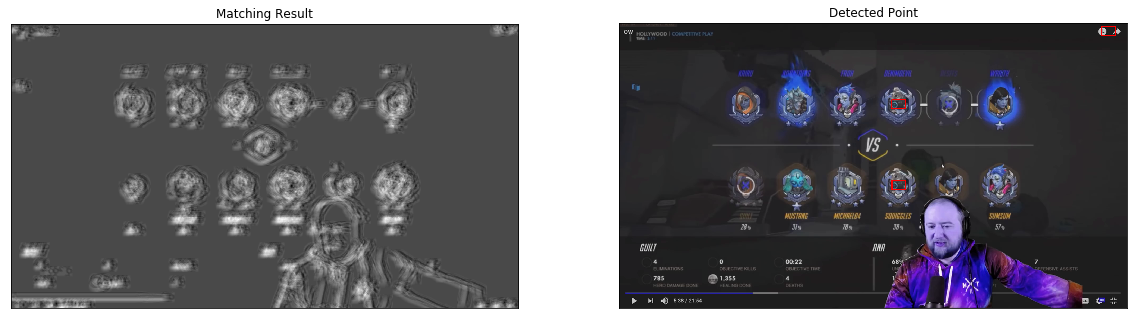

In [93]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = edgesDilated
img2 = img.copy()
template = roadhogEdgesDilated
w, h = template.shape[::-1]

img = img2.copy()
method = cv2.TM_SQDIFF# TM_CCOEFF_NORMED

res = cv2.matchTemplate(img,template,method)

img = cv2.imread(path)
result2 = np.reshape(res, res.shape[0]*res.shape[1])
sort = np.argsort(result2)
for i in range(0, 20):
    (y, x) = np.unravel_index(sort[i], res.shape)
    cv2.rectangle(img,(x,y), (x+w,y+h), 255, 2)

f = plt.figure(figsize=(20,8))

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()
